In [1]:
import numpy as np
import pandas as pd
import itertools 
import matplotlib.pyplot as plt
import math

In [2]:
df_ecopetrol = pd.read_csv("ecopetrol.csv")
df_ecopetrol

,Date,Price,Open,High,Low,Vol.,Change %
0,03/01/2024,"2,240.0","2,280.0","2,290.0","2,200.0",9.33M,-2.18%
1,02/29/2024,"2,290.0","2,315.0","2,320.0","2,290.0",3.39M,-0.43%
2,02/28/2024,"2,300.0","2,360.0","2,380.0","2,300.0",4.52M,-2.54%
3,02/27/2024,"2,360.0","2,340.0","2,370.0","2,340.0",2.18M,0.64%
4,02/26/2024,"2,345.0","2,340.0","2,350.0","2,325.0",4.09M,0.64%
...,...,...,...,...,...,...,...
949,04/07/2020,"2,230.0","2,295.0","2,385.0","2,215.0",10.78M,-1.33%
950,04/06/2020,"2,260.0","2,270.0","2,315.0","2,180.0",10.53M,-0.44%
951,04/03/2020,"2,270.0","2,100.0","2,270.0","2,085.0",16.69M,9.13%
952,04/02/2020,"2,080.0","1,900.0","2,165.0","1,900.0",13.56M,13.04%


# Preprocesamiento

In [3]:
#Eliminar columnas inútiles
df_ecopetrol = df_ecopetrol.drop(columns=['Open','High','Low','Vol.','Change %'])

#Se invierte el dataframe para empezar desde los datos mas antiguos
df_ecopetrol = df_ecopetrol.iloc[::-1]
df_ecopetrol = df_ecopetrol.reset_index(drop=True)

#Convertir los precios de string a float
df_ecopetrol['Price'] = df_ecopetrol['Price'].str.replace(',', '')
df_ecopetrol['Price'] = df_ecopetrol['Price'].astype(float)

#Añade la columna Y_n definida en la guía
new_col = [0]
for i in range(1, len(df_ecopetrol)):
    new_col.append(float((df_ecopetrol['Price'][i]/df_ecopetrol['Price'][i-1]) - 1))
df_ecopetrol.insert(2, 'Yn', new_col, True)

#Eliminamos primer dato debido a que no se puede calcular Yn
df_ecopetrol = df_ecopetrol.drop([0])
df_ecopetrol = df_ecopetrol.reset_index(drop=True)

In [4]:
# Temporalmente ajusta las opciones de visualización para el DataFrame df_ecopetrol
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df_ecopetrol)

           Date   Price         Yn
0    04/02/2020  2080.0  1.304e-01
1    04/03/2020  2270.0  9.135e-02
2    04/06/2020  2260.0 -4.405e-03
3    04/07/2020  2230.0 -1.327e-02
4    04/08/2020  2360.0  5.830e-02
5    04/13/2020  2250.0 -4.661e-02
6    04/14/2020  2225.0 -1.111e-02
7    04/15/2020  2095.0 -5.843e-02
8    04/16/2020  2090.0 -2.387e-03
9    04/17/2020  1950.0 -6.699e-02
10   04/20/2020  1905.0 -2.308e-02
11   04/21/2020  1840.0 -3.412e-02
12   04/22/2020  1920.0  4.348e-02
13   04/23/2020  1980.0  3.125e-02
14   04/24/2020  1910.0 -3.535e-02
15   04/27/2020  1950.0  2.094e-02
16   04/28/2020  2075.0  6.410e-02
17   04/29/2020  2070.0 -2.410e-03
18   04/30/2020  2090.0  9.662e-03
19   05/04/2020  1960.0 -6.220e-02
20   05/05/2020  1985.0  1.276e-02
21   05/06/2020  1950.0 -1.763e-02
22   05/07/2020  1975.0  1.282e-02
23   05/08/2020  2040.0  3.291e-02
24   05/11/2020  2065.0  1.225e-02
25   05/12/2020  1995.0 -3.390e-02
26   05/13/2020  1920.0 -3.759e-02
27   05/14/2020  193

# Definición de estados

In [5]:
#calcula estados basados en el valor de la columna 'Yn' en relación con la desviación estándar de una ventana de datos de tamaño l
new_col = []
l = 20
data = df_ecopetrol['Yn']

for i, percentage in enumerate(data):
    if(i >= (l - 1)):
        min = i - l + 1
        
        desviacion = np.std(data[min:i])

        if percentage >= (2 * desviacion):
            new_col.append('S3')
        elif percentage >= desviacion:
            new_col.append('S2')
        elif percentage >= 0:
            new_col.append('S1')
        elif percentage >= -(desviacion):
            new_col.append('B1')
        elif percentage >= -(2 * desviacion):
            new_col.append('B2')
        else:
            new_col.append('B3')

# Elimina las primeras filas del DataFrame df_ecopetrol que se utilizaron para calcular los primeros estados
df_ecopetrol = df_ecopetrol.drop([i for i in range(l-1)])
# Inserta la columna de estados calculados en la posición 2 del DataFrame df_ecopetrol
df_ecopetrol.insert(2, 'Estado', new_col, True)
# Reestablece los índices del DataFrame df_ecopetrol después de eliminar las filas
df_ecopetrol = df_ecopetrol.reset_index(drop=True)

In [6]:
df_ecopetrol

,Date,Price,Estado,Yn
0,05/04/2020,1960.0,B2,-0.062201
1,05/05/2020,1985.0,S1,0.012755
2,05/06/2020,1950.0,B1,-0.017632
3,05/07/2020,1975.0,S1,0.012821
4,05/08/2020,2040.0,S1,0.032911
...,...,...,...,...
929,02/26/2024,2345.0,S1,0.006438
930,02/27/2024,2360.0,S1,0.006397
931,02/28/2024,2300.0,B3,-0.025424
932,02/29/2024,2290.0,B1,-0.004348


In [7]:
estados_posibles = ['B3', 'B2', 'B1', 'S1', 'S2', 'S3']  # Posibles estados del sistema

total_cols = len(estados_posibles)  # Calcula el número total de columnas, que es igual al número de estados posibles
total_rows = total_cols * total_cols  # Calcula el número total de filas como el cuadrado del número de estados posibles


In [8]:
#matriz de transición para un modelo Markoviano
estados = np.array(df_ecopetrol['Estado'])

markovian_table = np.array(estados)
estados = np.delete(estados, 0)
estados = np.append(estados, 0)
markovian_table = np.vstack([markovian_table,estados])
estados = np.delete(estados, 0)
estados = np.append(estados, 0)
markovian_table = np.vstack([markovian_table,estados])

markovian_table = markovian_table.T
markovian_table = np.delete(markovian_table, [-1, -2], axis=0)
markovian_table 

array([['B2', 'S1', 'B1'],
       ['S1', 'B1', 'S1'],
       ['B1', 'S1', 'S1'],
       ...,
       ['S1', 'S1', 'B3'],
       ['S1', 'B3', 'B1'],
       ['B3', 'B1', 'B2']], dtype=object)

In [9]:
#frecuencias esperadas de transición entre estados
expected_freq = [[0] * (total_cols + 1) for i in range(total_cols)]

for i in range(len(markovian_table)):
    actual = markovian_table[i][1]
    row_index = estados_posibles.index(actual)
    col_index = estados_posibles.index(markovian_table[i][2])

    expected_freq[row_index][col_index] += 1
    expected_freq[row_index][total_cols] += 1

cols = estados_posibles.copy()
cols.append('Recuento')
expected_freq_df = pd.DataFrame(expected_freq, columns=cols)
cols.pop(-1)
expected_freq_df.insert(0, 'T_Actual', cols)
expected_freq_df

,T_Actual,B3,B2,B1,S1,S2,S3,Recuento
0,B3,1,5,13,13,8,1,41
1,B2,8,4,32,33,8,4,89
2,B1,13,30,110,118,41,5,317
3,S1,8,31,115,117,52,14,337
4,S2,10,19,36,44,7,4,120
5,S3,1,1,11,11,4,0,28


In [10]:
#Verifica si la frecuencia esperada de transición entre estados en el modelo Markoviano es mayor o igual a 5 para la validez empírica del modelo. 
invalid_counter = 0

for i in range(total_cols):
    for j in range(1,total_cols + 1):
        if expected_freq_df.iat[i, j] < 5:
            invalid_counter += 1
            
cumple_empirica = invalid_counter < 0.25 * (total_cols ** 2)
print(f'Cumple la empírica? RTA: {cumple_empirica}') 

Cumple la empírica? RTA: False


# Modelo - Matriz de transición

In [11]:
# probabilidad de transición entre los estados del modelo Markoviano
model_freq = [[0] * total_cols for i in range(total_cols)]
total_freq = [0,0,0,0,0,0,0,0]

for i in range(len(markovian_table)):
    actual = markovian_table[i][1]
    row_index = estados_posibles.index(actual)
    col_index = estados_posibles.index(markovian_table[i][2])

    model_freq[row_index][col_index] += 1
    total_freq[row_index] += 1

model_transition_prob_df = pd.DataFrame(model_freq, columns=estados_posibles)
model_transition_prob_df.insert(0, 'Actual', estados_posibles)

for i in range(total_cols):
    for j in range(1,total_cols+1):
        model_transition_prob_df.iat[i, j] = (model_transition_prob_df.iat[i, j]/total_freq[i]).astype(float)

model_transition_prob_df

C:\Users\aleja\AppData\Local\Temp\ipykernel_1468\868081643.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.024390243902439025' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  model_transition_prob_df.iat[i, j] = (model_transition_prob_df.iat[i, j]/total_freq[i]).astype(float)
C:\Users\aleja\AppData\Local\Temp\ipykernel_1468\868081643.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.12195121951219512' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  model_transition_prob_df.iat[i, j] = (model_transition_prob_df.iat[i, j]/total_freq[i]).astype(float)
C:\Users\aleja\AppData\Local\Temp\ipykernel_1468\868081643.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.3170731707317073' has

,Actual,B3,B2,B1,S1,S2,S3
0,B3,0.024390,0.121951,0.317073,0.317073,0.195122,0.024390
1,B2,0.089888,0.044944,0.359551,0.370787,0.089888,0.044944
2,B1,0.041009,0.094637,0.347003,0.372240,0.129338,0.015773
3,S1,0.023739,0.091988,0.341246,0.347181,0.154303,0.041543
4,S2,0.083333,0.158333,0.300000,0.366667,0.058333,0.033333
5,S3,0.035714,0.035714,0.392857,0.392857,0.142857,0.000000


# Propiedad Markoviana

In [12]:
# frecuencias observadas de transición entre pares de estados del modelo Markoviano
observed_rows = list(itertools.product(estados_posibles,repeat=2))

observed_freq = [[0] * (total_cols + 1) for i in range(total_rows)]

for i in range(len(markovian_table)):
    history = (markovian_table[i][0],markovian_table[i][1])
    row_index = observed_rows.index(history)
    col_index = estados_posibles.index(markovian_table[i][2])

    observed_freq[row_index][col_index] += 1
    observed_freq[row_index][total_cols] += 1

cols = estados_posibles.copy()
cols.append('Recuento')
observed_freq_df = pd.DataFrame(observed_freq, columns=cols)
observed_freq_df.insert(0, 'History', observed_rows)
observed_freq_df

,History,B3,B2,B1,S1,S2,S3,Recuento
0,"(B3, B3)",0,0,0,1,0,0,1
1,"(B3, B2)",2,0,0,3,0,0,5
2,"(B3, B1)",0,1,4,6,2,0,13
3,"(B3, S1)",1,4,3,2,3,0,13
4,"(B3, S2)",1,2,0,2,2,1,8
5,"(B3, S3)",1,0,0,0,0,0,1
6,"(B2, B3)",1,0,1,3,3,0,8
7,"(B2, B2)",0,0,3,1,0,0,4
8,"(B2, B1)",1,4,7,13,7,0,32
9,"(B2, S1)",0,1,7,14,9,3,34


In [13]:
# probabilidades observadas de transición entre pares de estados del modelo Markoviano utilizando las frecuencias observadas
observed_prob_df = observed_freq_df.copy()
for i in range(total_rows):
    for j in range(1,total_cols+1):
        if observed_prob_df.iat[i, total_cols+1] == 0:
            observed_prob_df.iat[i, j] = 0
        else:
            observed_prob_df.iat[i, j] = (observed_prob_df.iat[i, j]/observed_prob_df.iat[i, total_cols+1]).astype(float)

observed_prob_df = observed_prob_df.drop(columns=['Recuento'], axis=1)
observed_prob_df

C:\Users\aleja\AppData\Local\Temp\ipykernel_1468\4282028612.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.4' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  observed_prob_df.iat[i, j] = (observed_prob_df.iat[i, j]/observed_prob_df.iat[i, total_cols+1]).astype(float)
C:\Users\aleja\AppData\Local\Temp\ipykernel_1468\4282028612.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.6' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  observed_prob_df.iat[i, j] = (observed_prob_df.iat[i, j]/observed_prob_df.iat[i, total_cols+1]).astype(float)
C:\Users\aleja\AppData\Local\Temp\ipykernel_1468\4282028612.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.07692307692307693' has dtype incompati

,History,B3,B2,B1,S1,S2,S3
0,"(B3, B3)",0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
1,"(B3, B2)",0.400000,0.000000,0.000000,0.600000,0.000000,0.000000
2,"(B3, B1)",0.000000,0.076923,0.307692,0.461538,0.153846,0.000000
3,"(B3, S1)",0.076923,0.307692,0.230769,0.153846,0.230769,0.000000
4,"(B3, S2)",0.125000,0.250000,0.000000,0.250000,0.250000,0.125000
5,"(B3, S3)",1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,"(B2, B3)",0.125000,0.000000,0.125000,0.375000,0.375000,0.000000
7,"(B2, B2)",0.000000,0.000000,0.750000,0.250000,0.000000,0.000000
8,"(B2, B1)",0.031250,0.125000,0.218750,0.406250,0.218750,0.000000
9,"(B2, S1)",0.000000,0.029412,0.205882,0.411765,0.264706,0.088235


In [14]:
expected_freq = [[0] * (total_cols + 1) for i in range(total_cols)]

for i in range(len(markovian_table)):
    actual = markovian_table[i][1]
    row_index = estados_posibles.index(actual)
    col_index = estados_posibles.index(markovian_table[i][2])

    expected_freq[row_index][col_index] += 1
    expected_freq[row_index][total_cols] += 1

cols = estados_posibles.copy()
cols.append('Recuento')
expected_freq_df = pd.DataFrame(expected_freq, columns=cols)
cols.pop(-1)
expected_freq_df.insert(0, 'History', cols)
expected_freq_df

,History,B3,B2,B1,S1,S2,S3,Recuento
0,B3,1,5,13,13,8,1,41
1,B2,8,4,32,33,8,4,89
2,B1,13,30,110,118,41,5,317
3,S1,8,31,115,117,52,14,337
4,S2,10,19,36,44,7,4,120
5,S3,1,1,11,11,4,0,28


In [15]:
expected_prob_df = expected_freq_df.copy()
for i in range(total_cols):
    for j in range(1,total_cols+1):
        expected_prob_df.iat[i, j] = (expected_prob_df.iat[i, j]/expected_prob_df.iat[i, total_cols+1]).astype(float)

expected_prob_df = expected_prob_df.drop(columns=['Recuento'], axis=1)
expected_prob_df

C:\Users\aleja\AppData\Local\Temp\ipykernel_1468\1491194249.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.024390243902439025' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  expected_prob_df.iat[i, j] = (expected_prob_df.iat[i, j]/expected_prob_df.iat[i, total_cols+1]).astype(float)
C:\Users\aleja\AppData\Local\Temp\ipykernel_1468\1491194249.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.12195121951219512' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  expected_prob_df.iat[i, j] = (expected_prob_df.iat[i, j]/expected_prob_df.iat[i, total_cols+1]).astype(float)
C:\Users\aleja\AppData\Local\Temp\ipykernel_1468\1491194249.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.31707

,History,B3,B2,B1,S1,S2,S3
0,B3,0.024390,0.121951,0.317073,0.317073,0.195122,0.024390
1,B2,0.089888,0.044944,0.359551,0.370787,0.089888,0.044944
2,B1,0.041009,0.094637,0.347003,0.372240,0.129338,0.015773
3,S1,0.023739,0.091988,0.341246,0.347181,0.154303,0.041543
4,S2,0.083333,0.158333,0.300000,0.366667,0.058333,0.033333
5,S3,0.035714,0.035714,0.392857,0.392857,0.142857,0.000000


In [16]:
chi_values = []
k = 0

for i in range(total_rows):
    for j in range(1,total_cols+1):
        if expected_prob_df.iat[k,j] == 0:
            chi_parcial = (0)
        else: 
            chi_parcial = observed_freq_df.iat[i,total_cols+1] * ((observed_prob_df.iat[i,j] - expected_prob_df.iat[k,j]) ** 2) / expected_prob_df.iat[k,j]

        chi_values.append(chi_parcial)

    k += 1
    if k == total_cols:
        k = 0

chi_observado = sum(chi_values)
chi_observado

179.3489192896312

In [17]:
from scipy.stats.distributions import chi2

alpha = 0.01
rows = total_rows
cols = total_cols
grados = (rows - 1)*(cols - 1)

chi_teorico = chi2.ppf(1 - alpha, df=grados)
chi_teorico

221.4383745662851

In [18]:
is_not_markovian = chi_observado >= chi_teorico
print(f'Se rechaza la cadena (no es markoviana)? RTA: {is_not_markovian}')

Se rechaza la cadena (no es markoviana)? RTA: False


# Propiedad Estacionaria

Definiremos los periodos de tiempo como años

In [19]:
new_col = []
for date in df_ecopetrol['Date']:
    if '2020' in date:
        new_col.append(1)
    elif '2021' in date:
        new_col.append(2)
    elif '2022' in date:
        new_col.append(3)
    elif '2023' in date:
        new_col.append(4)
    else:
        new_col.append(5)
df_ecopetrol.insert(2, 'Periodo', new_col, True)

df_ecopetrol

,Date,Price,Periodo,Estado,Yn
0,05/04/2020,1960.0,1,B2,-0.062201
1,05/05/2020,1985.0,1,S1,0.012755
2,05/06/2020,1950.0,1,B1,-0.017632
3,05/07/2020,1975.0,1,S1,0.012821
4,05/08/2020,2040.0,1,S1,0.032911
...,...,...,...,...,...
929,02/26/2024,2345.0,5,S1,0.006438
930,02/27/2024,2360.0,5,S1,0.006397
931,02/28/2024,2300.0,5,B3,-0.025424
932,02/29/2024,2290.0,5,B1,-0.004348


In [20]:
periodos = np.array(df_ecopetrol['Periodo'])
estados = np.array(df_ecopetrol['Estado'])

stationary_table = np.array(periodos)
stationary_table = np.vstack([stationary_table, estados])
estados = np.delete(estados, 0)
estados = np.append(estados, 0)
stationary_table = np.vstack([stationary_table, estados])

stationary_table = stationary_table.T
stationary_table = np.delete(stationary_table, -1, axis=0)
stationary_table 

array([[1, 'B2', 'S1'],
       [1, 'S1', 'B1'],
       [1, 'B1', 'S1'],
       ...,
       [5, 'S1', 'B3'],
       [5, 'B3', 'B1'],
       [5, 'B1', 'B2']], dtype=object)

In [21]:
observed_rows = list(itertools.product([1,2,3,4,5], estados_posibles))

observed_freq = [[0] * (total_cols + 1) for i in range(len(observed_rows))]

for i in range(len(markovian_table)):
    history = (stationary_table[i][0], stationary_table[i][1])
    row_index = observed_rows.index(history)
    col_index = estados_posibles.index(stationary_table[i][2])

    observed_freq[row_index][col_index] += 1
    observed_freq[row_index][total_cols] += 1

cols = estados_posibles.copy()
cols.append('Recuento')
observed_freq_stat_df = pd.DataFrame(observed_freq, columns=cols)
observed_freq_stat_df.insert(0, 'History', observed_rows)
observed_freq_stat_df

,History,B3,B2,B1,S1,S2,S3,Recuento
0,"(1, B3)",0,0,1,4,2,0,7
1,"(1, B2)",2,0,6,4,1,0,13
2,"(1, B1)",3,5,15,24,5,1,53
3,"(1, S1)",1,4,23,20,11,3,62
4,"(1, S2)",1,3,8,8,2,0,22
5,"(1, S3)",0,0,1,2,1,0,4
6,"(2, B3)",0,1,1,4,2,0,8
7,"(2, B2)",1,2,8,7,3,3,24
8,"(2, B1)",5,8,39,25,10,1,88
9,"(2, S1)",0,8,26,28,17,3,82


In [22]:
observed_prob_stat_df = observed_freq_stat_df.copy()
for i in range(len(observed_rows)):
    for j in range(1,total_cols+1):
        if observed_prob_stat_df.iat[i, total_cols+1] == 0:
            observed_prob_stat_df.iat[i, j] = 0
        else:
            observed_prob_stat_df.iat[i, j] = (observed_prob_stat_df.iat[i, j]/observed_prob_stat_df.iat[i, total_cols+1]).astype(float)

observed_prob_stat_df = observed_prob_stat_df.drop(columns=['Recuento'], axis=1)
observed_prob_stat_df

C:\Users\aleja\AppData\Local\Temp\ipykernel_1468\1821551178.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.14285714285714285' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  observed_prob_stat_df.iat[i, j] = (observed_prob_stat_df.iat[i, j]/observed_prob_stat_df.iat[i, total_cols+1]).astype(float)
C:\Users\aleja\AppData\Local\Temp\ipykernel_1468\1821551178.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5714285714285714' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  observed_prob_stat_df.iat[i, j] = (observed_prob_stat_df.iat[i, j]/observed_prob_stat_df.iat[i, total_cols+1]).astype(float)
C:\Users\aleja\AppData\Local\Temp\ipykernel_1468\1821551178.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future err

,History,B3,B2,B1,S1,S2,S3
0,"(1, B3)",0.000000,0.000000,0.142857,0.571429,0.285714,0.000000
1,"(1, B2)",0.153846,0.000000,0.461538,0.307692,0.076923,0.000000
2,"(1, B1)",0.056604,0.094340,0.283019,0.452830,0.094340,0.018868
3,"(1, S1)",0.016129,0.064516,0.370968,0.322581,0.177419,0.048387
4,"(1, S2)",0.045455,0.136364,0.363636,0.363636,0.090909,0.000000
5,"(1, S3)",0.000000,0.000000,0.250000,0.500000,0.250000,0.000000
6,"(2, B3)",0.000000,0.125000,0.125000,0.500000,0.250000,0.000000
7,"(2, B2)",0.041667,0.083333,0.333333,0.291667,0.125000,0.125000
8,"(2, B1)",0.056818,0.090909,0.443182,0.284091,0.113636,0.011364
9,"(2, S1)",0.000000,0.097561,0.317073,0.341463,0.207317,0.036585


In [23]:
expected_prob_df

,History,B3,B2,B1,S1,S2,S3
0,B3,0.024390,0.121951,0.317073,0.317073,0.195122,0.024390
1,B2,0.089888,0.044944,0.359551,0.370787,0.089888,0.044944
2,B1,0.041009,0.094637,0.347003,0.372240,0.129338,0.015773
3,S1,0.023739,0.091988,0.341246,0.347181,0.154303,0.041543
4,S2,0.083333,0.158333,0.300000,0.366667,0.058333,0.033333
5,S3,0.035714,0.035714,0.392857,0.392857,0.142857,0.000000


In [24]:
chi_values = []
k = 0

for i in range(len(observed_rows)):
    for j in range(1,total_cols+1):
        if expected_prob_df.iat[k,j] == 0:
            chi_parcial = 0
        else: 
            chi_parcial = observed_freq_stat_df.iat[i,total_cols+1] * ((observed_prob_stat_df.iat[i,j] - expected_prob_df.iat[k,j]) ** 2) / expected_prob_df.iat[k,j]

        chi_values.append(chi_parcial)

    k += 1
    if k == total_cols:
        k = 0

chi_stat_observado = sum(chi_values)
chi_stat_observado

111.15981181366455

In [25]:
is_not_stationary = chi_stat_observado >= chi_teorico
print(f'La cadena no cumple la propiedad estacionaria? RTA: {is_not_stationary}')

La cadena no cumple la propiedad estacionaria? RTA: False


# Análisis de la cadena

## Punto A.

In [26]:
secuencias_posibles_s = list(itertools.product(estados_posibles[3:6], repeat=3))
secuencias_posibles = secuencias_posibles_s.copy()

secuencias_posibles_b = []
for i in range(3):
    for secuencia_s in secuencias_posibles_s:
        secuencia = (estados_posibles[i],)
        secuencia = secuencia + secuencia_s

        secuencias_posibles_b.append(secuencia)

secuencias_posibles.extend(secuencias_posibles_b)
print(f'La cantidad de cadenas posibles es {len(secuencias_posibles)}')

La cantidad de cadenas posibles es 108


In [27]:
probabilidad_vector = [0] * len(estados_posibles)
for secuencia in secuencias_posibles:
    if len(secuencia) == 3:
        prob_1 = model_transition_prob_df[secuencia[1]][list(model_transition_prob_df['Actual']).index(secuencia[0])]
        prob_2 = model_transition_prob_df[secuencia[2]][list(model_transition_prob_df['Actual']).index(secuencia[1])]
        prob = prob_1 * prob_2
        probabilidad_vector[list(model_transition_prob_df['Actual']).index(secuencia[0])] += prob
    else:
        prob_1 = model_transition_prob_df[secuencia[1]][list(model_transition_prob_df['Actual']).index(secuencia[0])]
        prob_2 = model_transition_prob_df[secuencia[2]][list(model_transition_prob_df['Actual']).index(secuencia[1])]
        prob_3 = model_transition_prob_df[secuencia[3]][list(model_transition_prob_df['Actual']).index(secuencia[2])]
        prob = prob_1 * prob_2 * prob_3
        probabilidad_vector[list(model_transition_prob_df['Actual']).index(secuencia[0])] += prob

print('Las probabilidad de subir 3 veces consecutivas para cada estado inicial es de:  (B3,B2,B1,S1,S2,S3)')
probabilidad_vector

Las probabilidad de subir 3 veces consecutivas para cada estado inicial es de:  (B3,B2,B1,S1,S2,S3)


[0.14360995147594421,
 0.13881515216188411,
 0.14070520828904906,
 0.28150580997748803,
 0.24370304625312042,
 0.27880811078140455]

## Punto B.

In [28]:
secuencias_posibles_b = list(itertools.product(estados_posibles[0:3], repeat=3))
secuencias_posibles = secuencias_posibles_b.copy()

secuencias_posibles_s = []
for i in range(3,6):
    for secuencia_b in secuencias_posibles_b:
        secuencia = (estados_posibles[i],)
        secuencia = secuencia + secuencia_b

        secuencias_posibles_s.append(secuencia)

secuencias_posibles.extend(secuencias_posibles_s)
print(f'La cantidad de cadenas posibles es {len(secuencias_posibles)}')

La cantidad de cadenas posibles es 108


In [29]:
probabilidad_vector = [0] * len(estados_posibles)
for secuencia in secuencias_posibles:
    if len(secuencia) == 3:
        prob_1 = model_transition_prob_df[secuencia[1]][list(model_transition_prob_df['Actual']).index(secuencia[0])]
        prob_2 = model_transition_prob_df[secuencia[2]][list(model_transition_prob_df['Actual']).index(secuencia[1])]
        prob = prob_1 * prob_2
        probabilidad_vector[list(model_transition_prob_df['Actual']).index(secuencia[0])] += prob
    else:
        prob_1 = model_transition_prob_df[secuencia[1]][list(model_transition_prob_df['Actual']).index(secuencia[0])]
        prob_2 = model_transition_prob_df[secuencia[2]][list(model_transition_prob_df['Actual']).index(secuencia[1])]
        prob_3 = model_transition_prob_df[secuencia[3]][list(model_transition_prob_df['Actual']).index(secuencia[2])]
        prob = prob_1 * prob_2 * prob_3
        probabilidad_vector[list(model_transition_prob_df['Actual']).index(secuencia[0])] += prob

print('Las probabilidad de bajar 3 veces consecutivas para cada estado inicial es de: (B3,B2,B1,S1,S2,S3)')
probabilidad_vector

Las probabilidad de bajar 3 veces consecutivas para cada estado inicial es de: (B3,B2,B1,S1,S2,S3)


[0.22462860234226112,
 0.23741168669370516,
 0.23327234564006943,
 0.10677480965831138,
 0.12629093761371257,
 0.10814414610988321]

## Punto C.

In [30]:
import numpy as np
 
# Define the transition matrix
P = model_transition_prob_df.drop(columns=['Actual']).to_numpy(copy=True)
 
# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(P.T)
 
# Find the eigenvector corresponding to eigenvalue 1
stationary_distribution = np.array(eigenvectors[:, np.isclose(eigenvalues, 1)])
 
# Normalize the stationary distribution
stationary_distribution = stationary_distribution / stationary_distribution.sum()

#Convert to real numbers
stationary_distribution = stationary_distribution.real

#Convert to 1,6 vector
stationary_distribution = stationary_distribution.T
 
print("Stationary Distribution:", stationary_distribution)

# Calcula el tiempo de retorno como el inverso de la probabilidad de permanecer en el estado actual
tiempo_retorno = 1 / stationary_distribution

# Imprime el tiempo de retorno
print("Tiempo de retorno:", tiempo_retorno)

Stationary Distribution: [[0.04405602 0.09651641 0.34014855 0.36053669 0.12869718 0.03004516]]
Tiempo de retorno: [[22.69837387 10.36093282  2.93989203  2.77364285  7.77017805 33.28322739]]


In [31]:
np.dot(stationary_distribution, P)

array([[0.04405602, 0.09651641, 0.34014855, 0.36053669, 0.12869718,
        0.03004516]])

In [32]:
def calcular_primeras_pasadas(transition_matrix):
    n = len(transition_matrix)

    p_matrix = np.zeros((n**2, n**2))
    for i in range(n):
        for j in range(n):
            for k in range(n):
                if k != j:
                    p_matrix[i * n + j][k * n + j] = transition_matrix[i][k]

    A =  p_matrix - np.eye(n ** 2)
    B = np.ones(shape=(n**2))
    ans_vector = np.linalg.solve(A, -B)
    return ans_vector

vector_primeras_pasadas = calcular_primeras_pasadas(P)
matriz_primeras_pasadas = np.array(vector_primeras_pasadas).reshape((int(len(vector_primeras_pasadas)**0.5), int(len(vector_primeras_pasadas)**0.5)))
print("Matriz de tiempos de primera pasada:")
print(matriz_primeras_pasadas)

Matriz de tiempos de primera pasada:
[[22.69837387  9.54711904  3.03177648  2.85731773  6.80451851 32.44217692]
 [21.4288235  10.36093282  2.90061062  2.71763969  7.50791955 31.83755899]
 [22.43367745  9.84659744  2.93989203  2.70928562  7.25915209 32.73747239]
 [22.79549464  9.87697888  2.95483609  2.77364285  7.08655338 31.90719207]
 [21.48828756  9.25826791  3.06801864  2.72881245  7.77017805 32.1398305 ]
 [22.60367381 10.41212608  2.81098781  2.65329818  7.14697137 33.28322739]]


## Punto D.

# Algoritmo para interpretar resultados

## Proof of concept

In [33]:
list1 = []
list2 = []

for i, percentage in enumerate(data):
    if(i >= (l - 1)):
        min = i - l + 1
        
        std1 = np.std(data[min:i])
        std2 = np.std(data[min:i-1])

        if percentage >= (2 * std1):
            list1.append('S3')
        elif percentage >= std1:
            list1.append('S2')
        elif percentage >= 0:
            list1.append('S1')
        elif percentage >= -(std1):
            list1.append('B1')
        elif percentage >= -(2 * std1):
            list1.append('B2')
        else:
            list1.append('B3')

        if percentage >= (2 * std2):
            list2.append('S3')
        elif percentage >= std2:
            list2.append('S2')
        elif percentage >= 0:
            list2.append('S1')
        elif percentage >= -(std2):
            list2.append('B1')
        elif percentage >= -(2 * std2):
            list2.append('B2')
        else:
            list2.append('B3')


unequal_count = sum(a != b for a, b in zip(list1, list2))
unequal_count

percentage_unequal = unequal_count/len(list1)
print(f"El porcentaje de datos que tienen estados diferentes al considerar su desviacion estandar sin contarse a si mismos es del {percentage_unequal*100}%")

El porcentaje de datos que tienen estados diferentes al considerar su desviacion estandar sin contarse a si mismos es del 1.6059957173447537%


## Algoritmo

In [34]:
estados_posibles
estados_dict = {'B3':-2,'B2':-1,'B1':0,'S1':1,'S2':2,'S3':3}

def pasar_a_dinero(y_inicial, historial, cadena_estados):
    cadena_porcentajes = []
    y = y_inicial
    y_min = y
    y_max = y

    for i, estado in enumerate(cadena_estados):
        data_actual = []

        if(i<20):
            data_actual.extend(historial[-(20-i):])
            data_actual.extend(cadena_porcentajes[:i-1])
        else:
            data_actual.extend(cadena_porcentajes[-(19):])

        desviacion_actual = np.std(data_actual)
        y_min = y_min + (estados_dict[estado] - 1) * desviacion_actual * y_min
        y_max = y_max + estados_dict[estado] * desviacion_actual * y_max

        cadena_porcentajes.append(float((((y_min + y_max) / 2)/y) - 1))
        y = (y_min + y_max) / 2

    return y, (y_min, y_max)

## Test

In [35]:
import random

estados = np.array(df_ecopetrol['Estado'])
yn = np.array(df_ecopetrol['Yn'])
prices = np.array(df_ecopetrol['Price'])

min = random.randint(20, len(estados) - 20)
max = min + 10

y_final, aprox_range = pasar_a_dinero(prices[min], yn[min-19:min], estados[min:max])
print(f'El precio final calculado fue de aproximadamente {y_final}')
print(f'El valor real podría estar en el siguiente rango: {aprox_range}')
print(f'El precio real es de {prices[max]}')

El precio final calculado fue de aproximadamente 2283.6538746619035
El valor real podría estar en el siguiente rango: (2105.0922495583322, 2462.2154997654743)
El precio real es de 2480.0


In [36]:
estados = np.array(df_ecopetrol['Estado'])
yn = np.array(df_ecopetrol['Yn'])
prices = np.array(df_ecopetrol['Price'])

x = range(2, 50)
y1 = []
y2 = []

for n in x:
    wrong_prediction_counter = 0
    avg_squared_distance = 0
    longitud_cadena = n

    for i in range(20, len(estados) - longitud_cadena):
        min = i
        max = min + longitud_cadena

        y_final, aprox_range = pasar_a_dinero(prices[min], yn[min-19:min], estados[min:max])
        if prices[max] > aprox_range[1] or prices[max] < aprox_range[0]:
            wrong_prediction_counter += 1
        avg_squared_distance += (y_final - prices[max]) ** 2

    avg_squared_distance = avg_squared_distance / (len(estados)-20)

    y1.append(avg_squared_distance ** 0.5)
    y2.append(wrong_prediction_counter)

<function matplotlib.pyplot.show(close=None, block=None)>

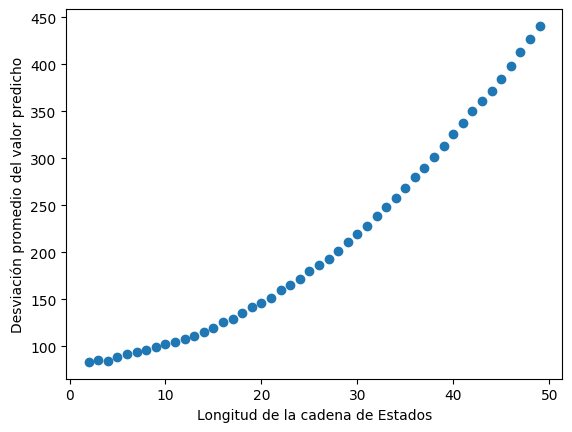

In [37]:
plt.scatter(x=x, y=y1)
plt.xlabel("Longitud de la cadena de Estados")
plt.ylabel("Desviación promedio del valor predicho")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

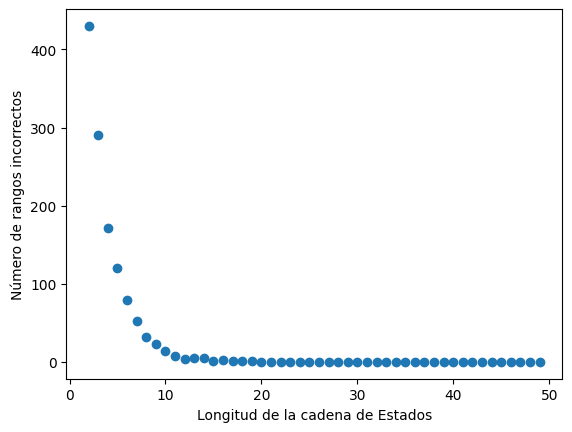

In [38]:
plt.scatter(x=x, y=y2)
plt.xlabel("Longitud de la cadena de Estados")
plt.ylabel("Número de rangos incorrectos")
plt.show